### Exploratory Data Analysis (EDA) for Daily SLIE GeoTIFFs

This notebook executes EDA for the daily SLIE landfast sea ice data for both the Chukchi Sea and the Beaufort Sea ice zones.

For each zone and ice year a sample of the data will be plotted and metadata will be tested for consistency.

We will examine the total file counts for each zone and the associated timestamps encoded in the file names as well.

We will also determine a strategy for reprojecting these data.

In [1]:
from pathlib import Path

import rasterio as rio
import matplotlib.pyplot as plt
import pandas as pd
from rasterio.warp import Resampling, aligned_target
from rasterio.transform import array_bounds
from rasterio.merge import merge

import eda as eda
from luts import ice_zones, ice_years
from config import INPUT_DIR, SCRATCH_DIR

/import/beegfs/CMIP6/cparr4/repos/ardac-curation/landfast_sea_ice/config.py:10: UserWarning: INPUT_ZIP_DIR not set; using None.
  warnings.warn("INPUT_ZIP_DIR not set; using None.")


In [2]:
daily_slie_paths = []
for region in ice_zones:
    for year in ice_years:
        daily_slie_paths.append(Path(INPUT_DIR / region / year))

In [3]:
chuk_dates = []
beauf_dates = []
for directory in daily_slie_paths:

    geotiff_dates = eda.get_dates(directory)
    if "Chuk" in directory.parent.name:
        chuk_dates = chuk_dates + geotiff_dates
    elif "Beau" in directory.parent.name:
        beauf_dates = beauf_dates + geotiff_dates
    else:
        print(directory.parent.name)

print(len(beauf_dates))
print(len(chuk_dates))

dates_in_beaufort_not_in_chukchi = list(set(beauf_dates) - set(chuk_dates))
print(len(dates_in_beaufort_not_in_chukchi))

time_index = pd.to_datetime(dates_in_beaufort_not_in_chukchi)
missing_dates = time_index.sort_values()
missing_dates.to_series().to_csv(SCRATCH_DIR / "dates_in_beau_but_not_in_chuk.csv", index=False)

100%|████████████████████████████████████████████████████████████████████████████████████| 304/304 [00:00<00:00, 477911.70it/s]


7797
7668
160


There are 160 dates for which the Beaufort region has data, but the Chukchi region does not (i.e., there are no GeoTIFF files for those dates).
Most of the "missing" dates are in July and all of them are within the 1997-2008 period.

Awaiting PI confirmation regarding whether or not this is a known and expected difference in observing capabilities between the two regions vs. being an unintentional data gap.

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/1996-97 is identical.


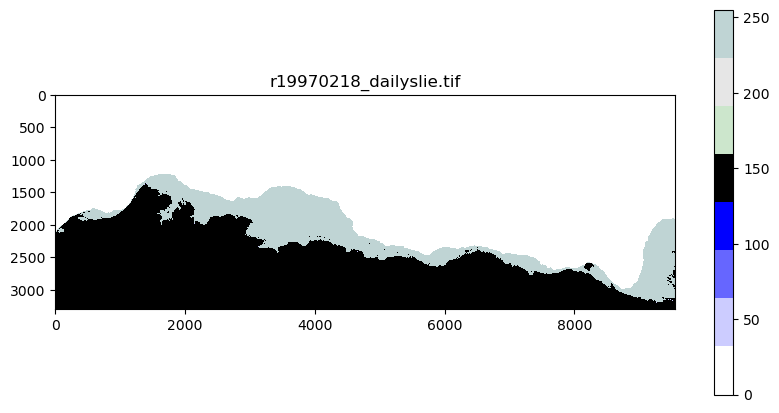

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/1997-98 is identical.


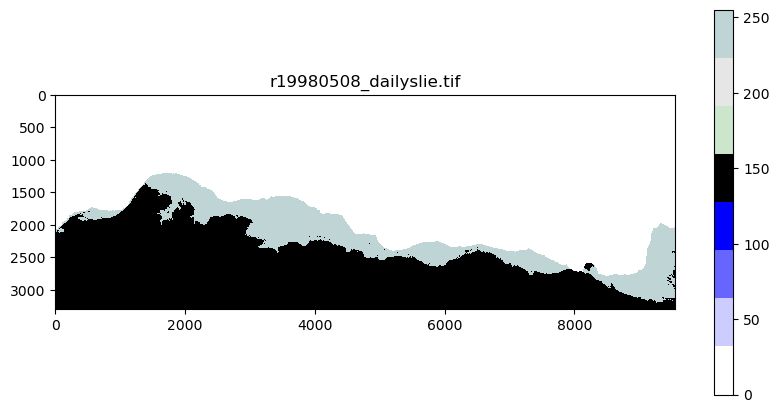

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/1998-99 is identical.


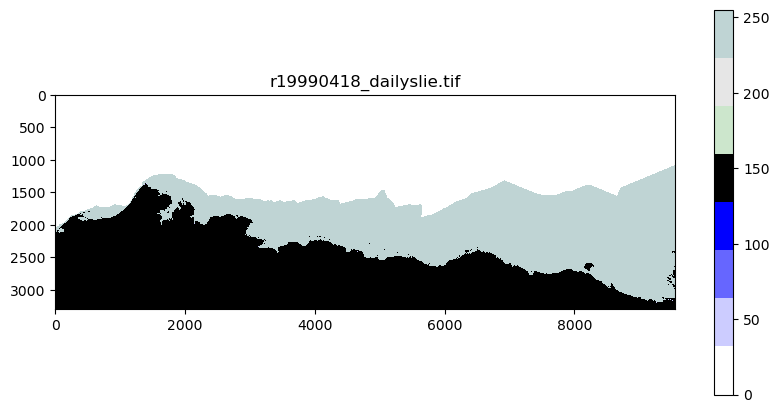

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/1999-00 is identical.


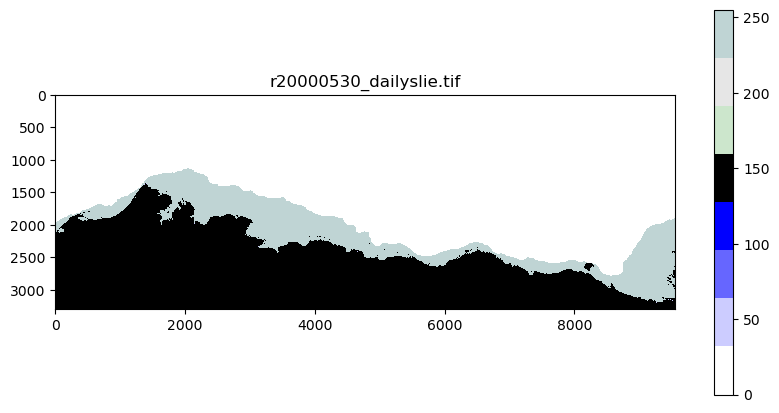

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2000-01 is identical.


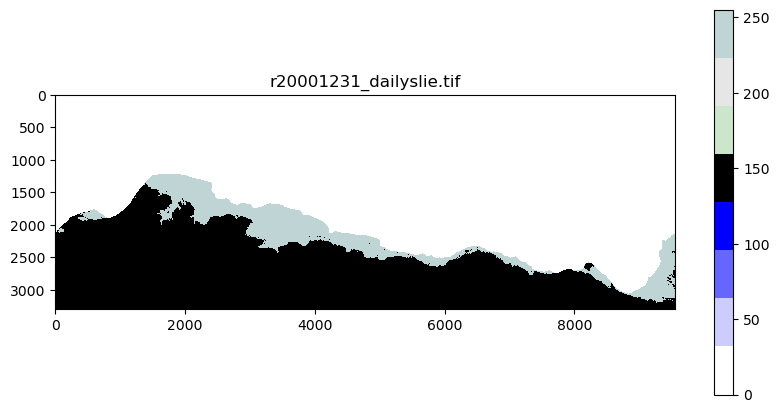

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2001-02 is identical.


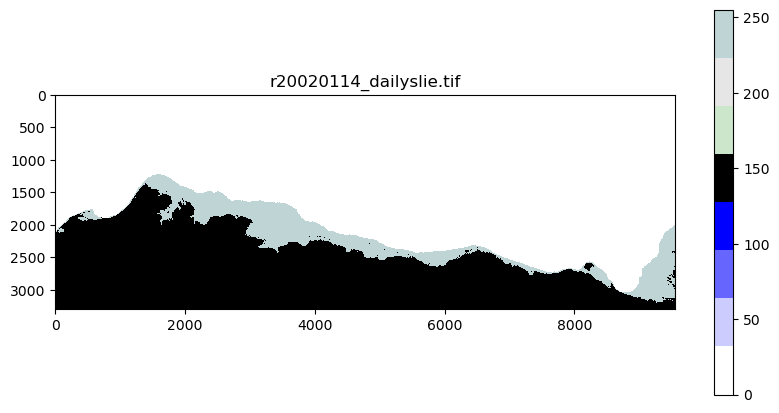

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2002-03 is identical.


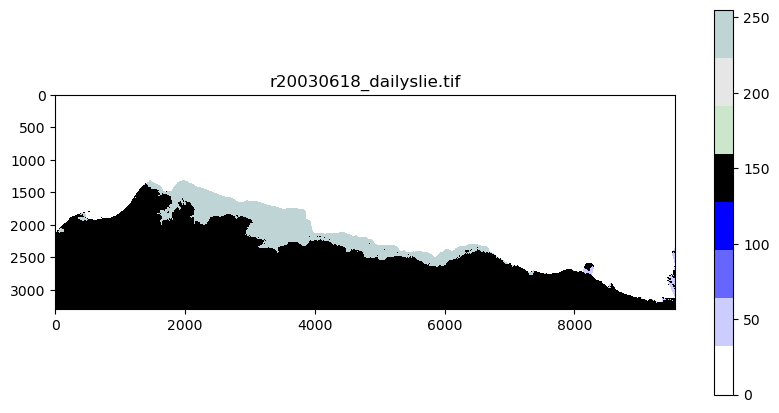

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2003-04 is identical.


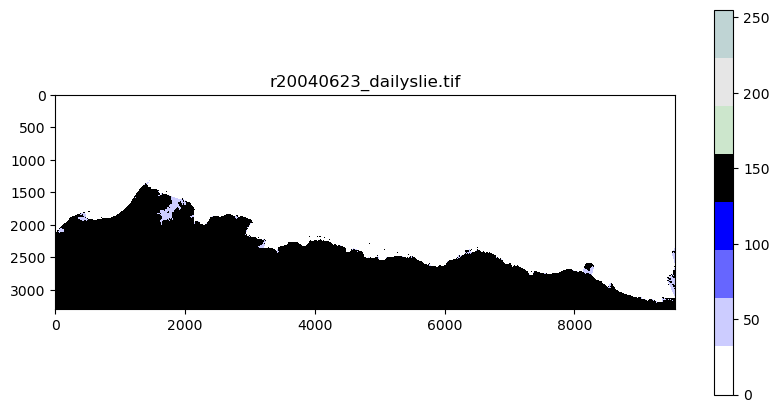

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2004-05 is identical.


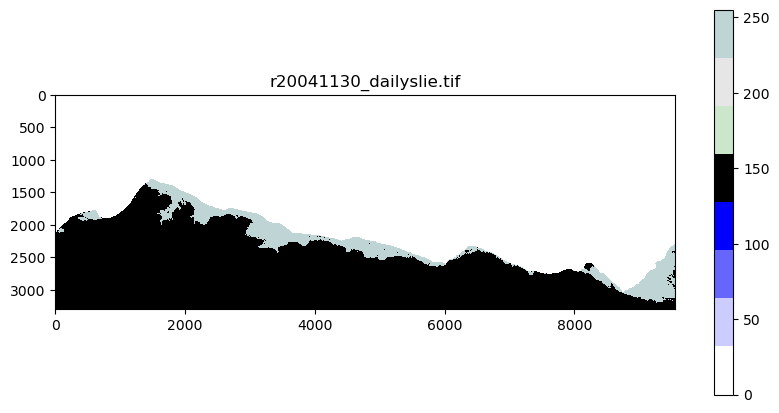

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2005-06 is identical.


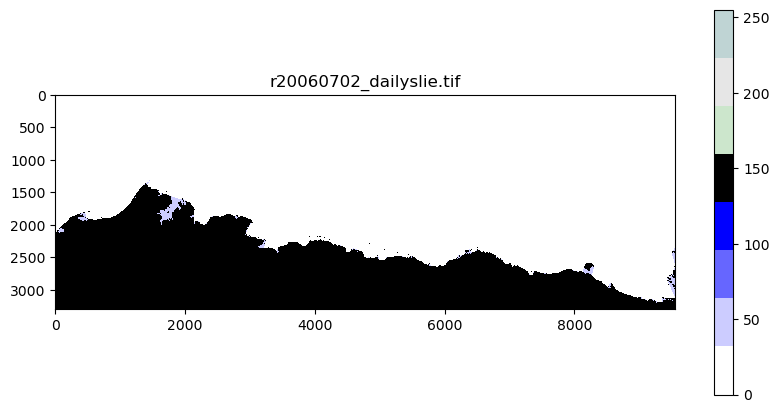

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2006-07 is identical.


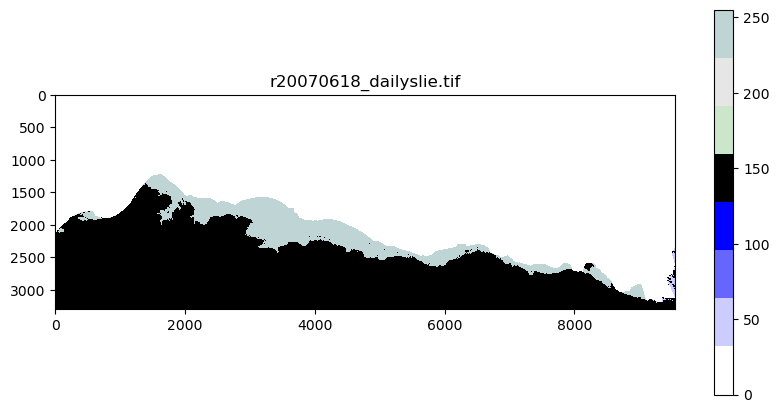

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2007-08 is identical.


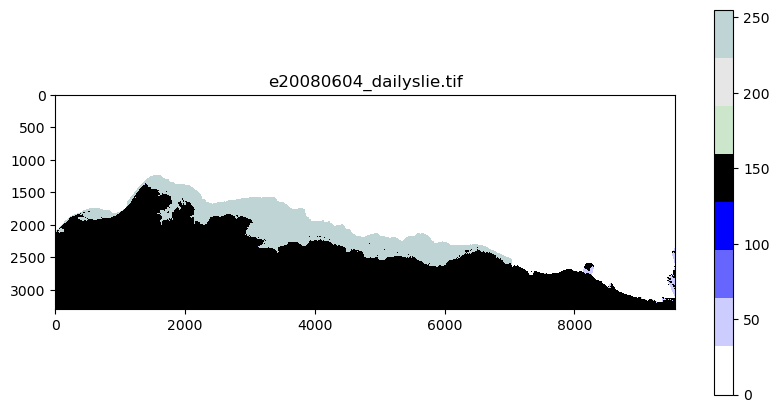

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2008-09 is identical.


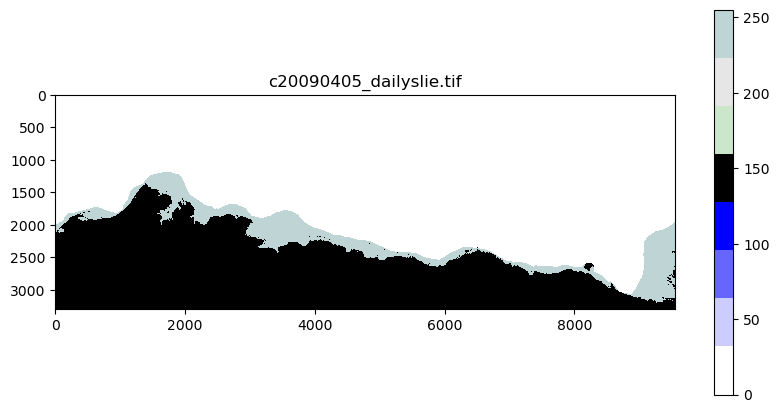

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2009-10 is identical.


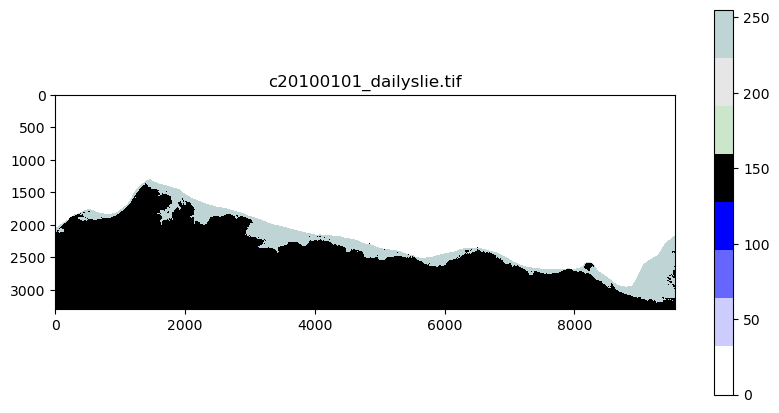

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2010-11 is identical.


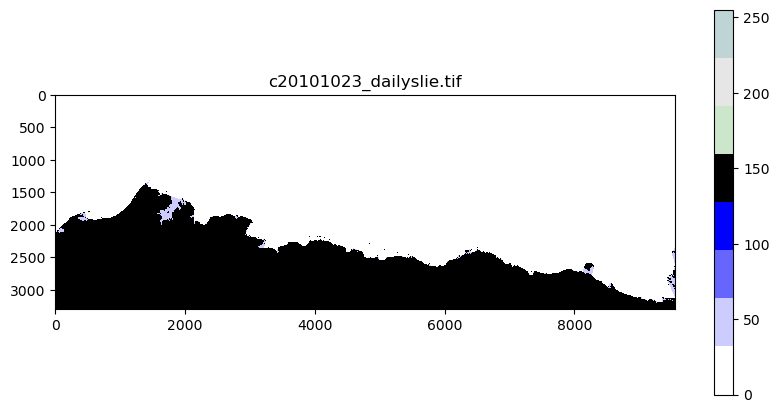

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2011-12 is identical.


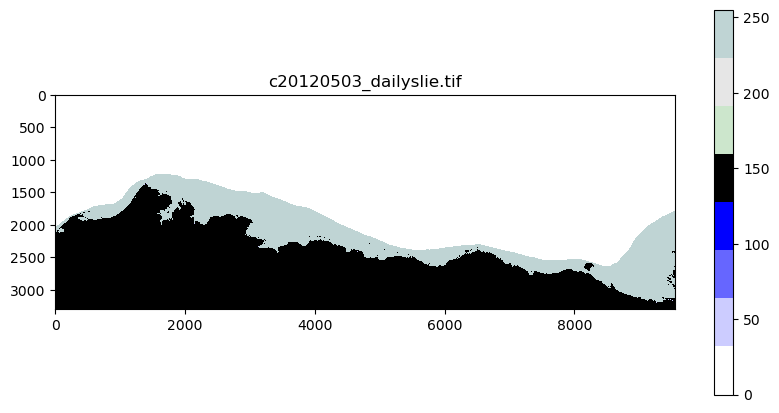

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2012-13 is identical.


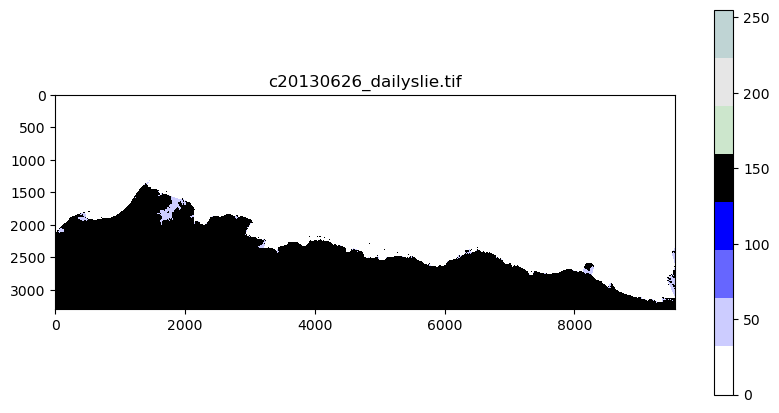

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2013-14 is identical.


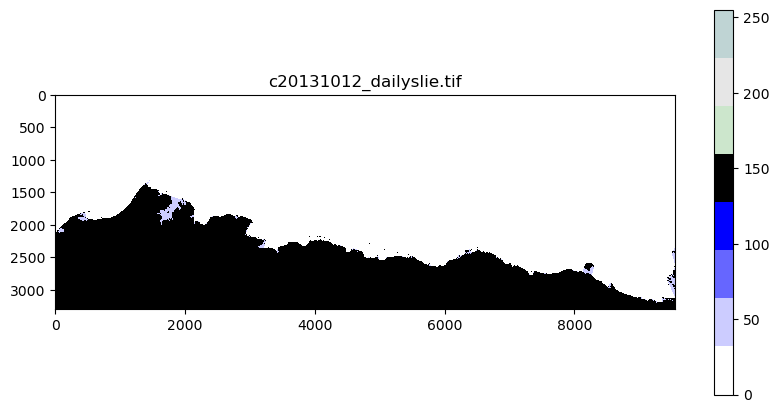

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2014-15 is identical.


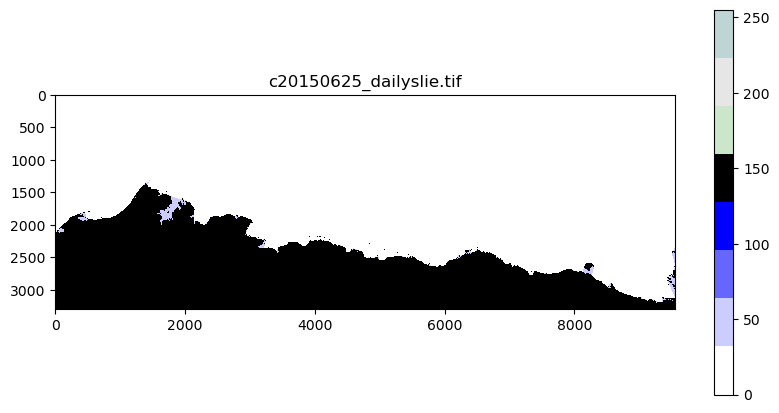

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2015-16 is identical.


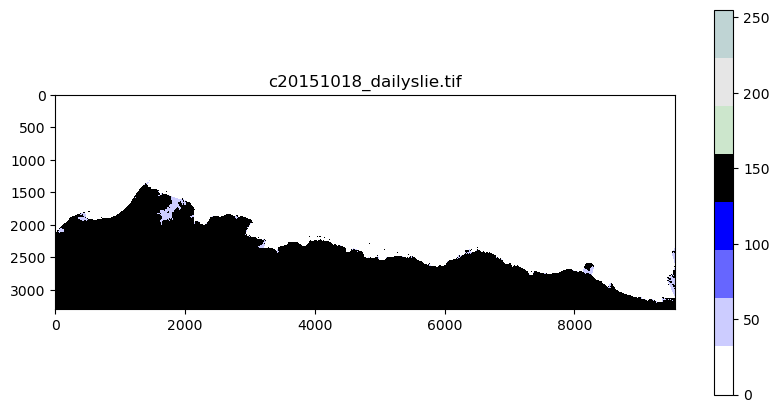

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2016-17 is identical.


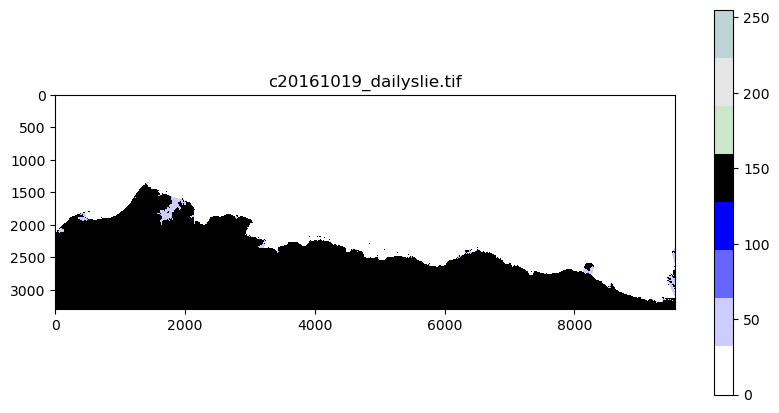

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2017-18 is identical.


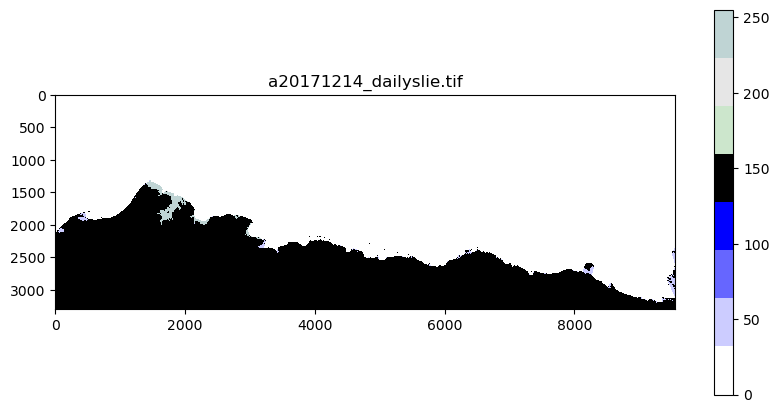

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2018-19 is identical.


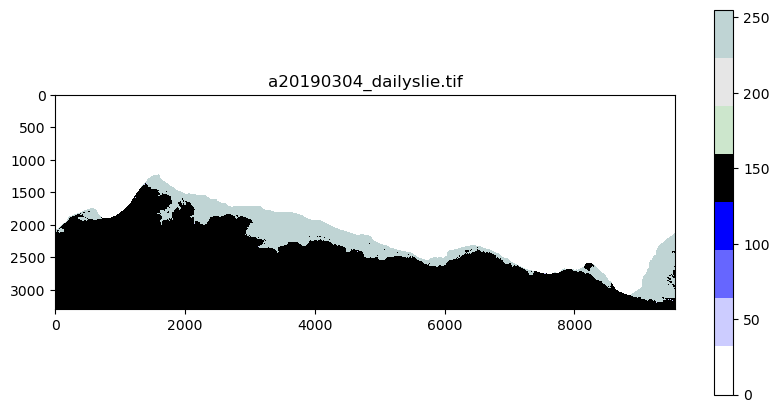

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2019-20 is identical.


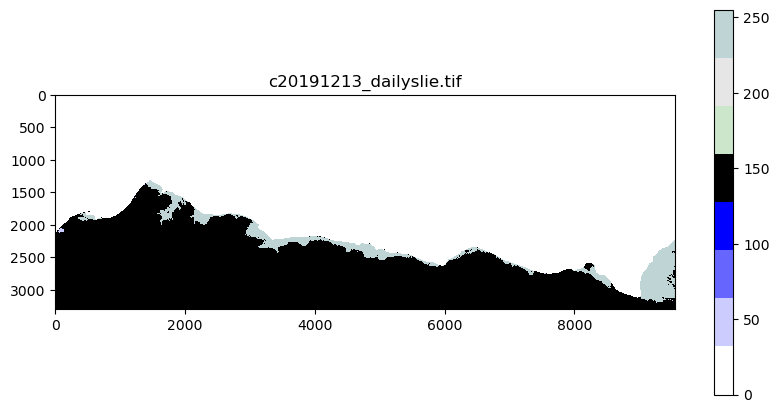

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2020-21 is identical.


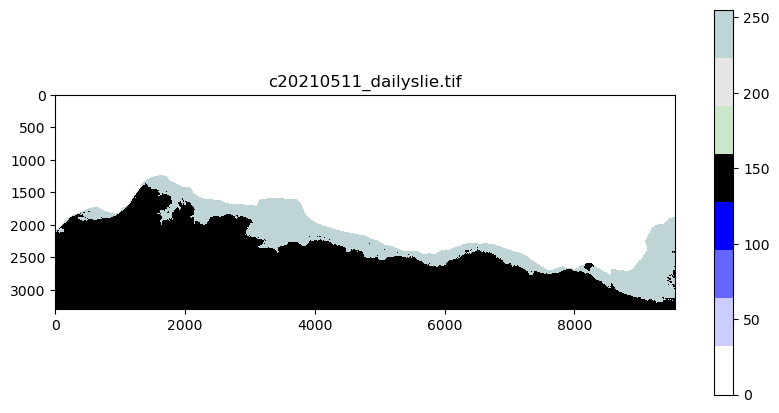

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2021-22 is identical.


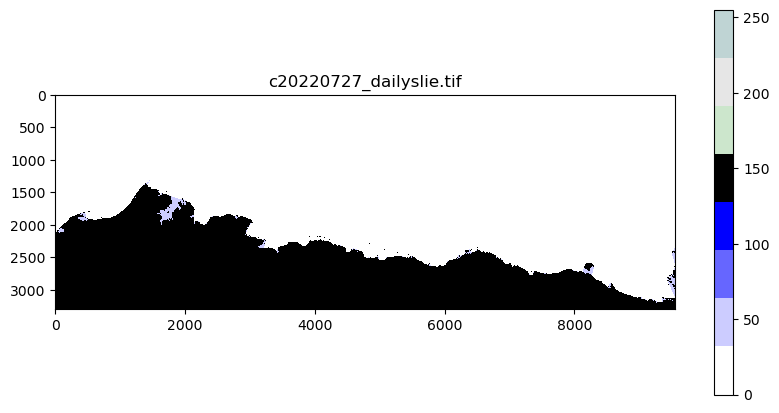

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2022-23 is identical.


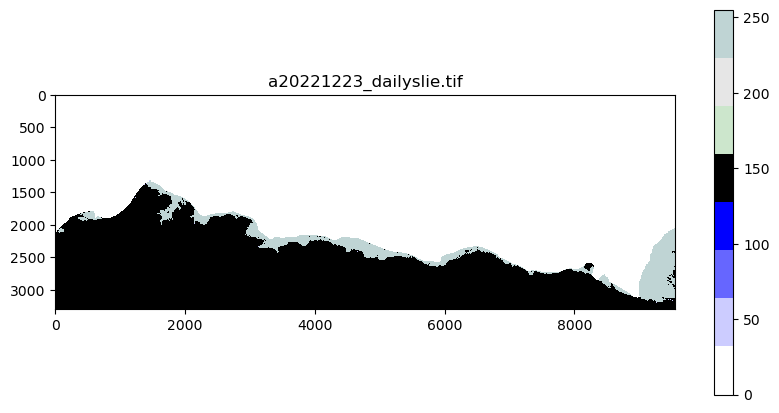

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/1996-97 is identical.


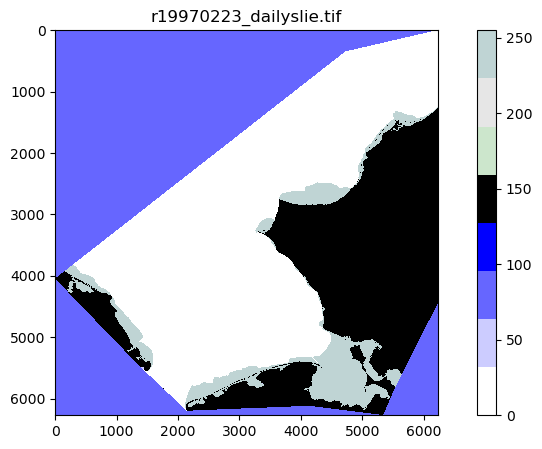

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/1997-98 is identical.


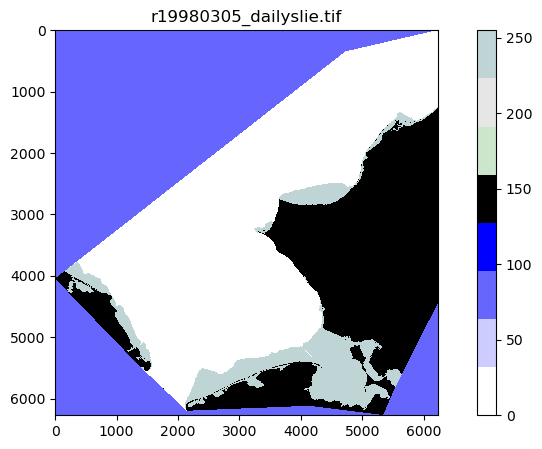

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/1998-99 is identical.


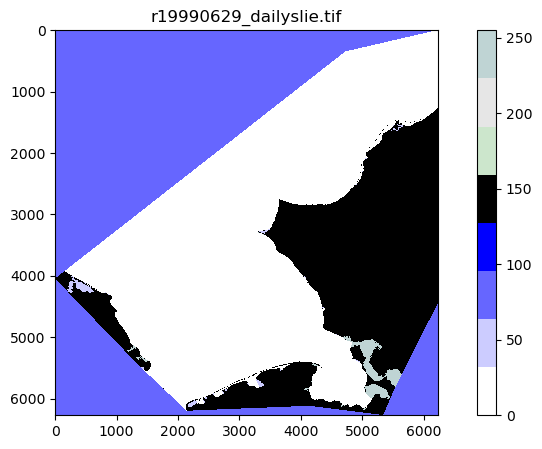

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/1999-00 is identical.


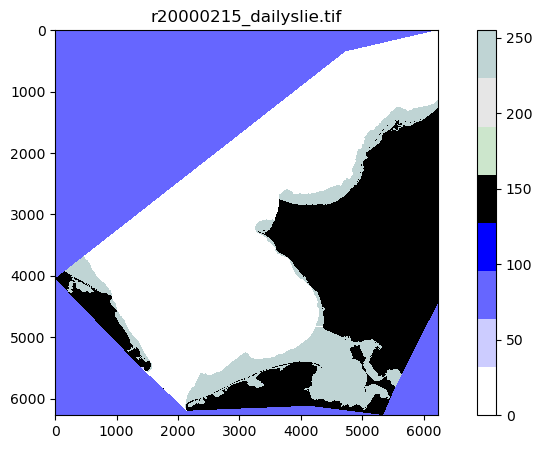

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2000-01 is identical.


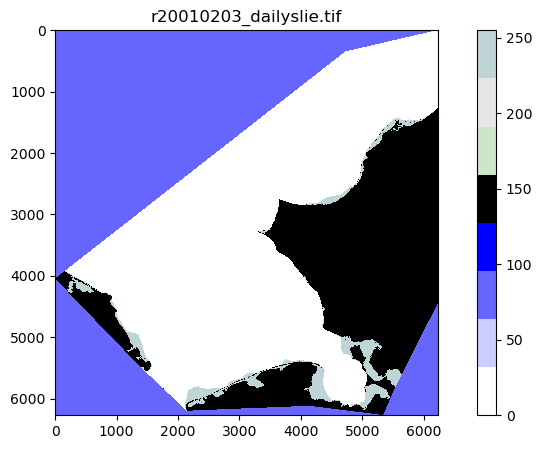

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2001-02 is identical.


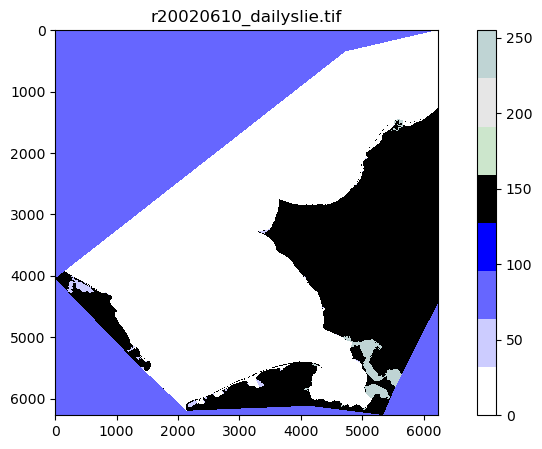

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2002-03 is identical.


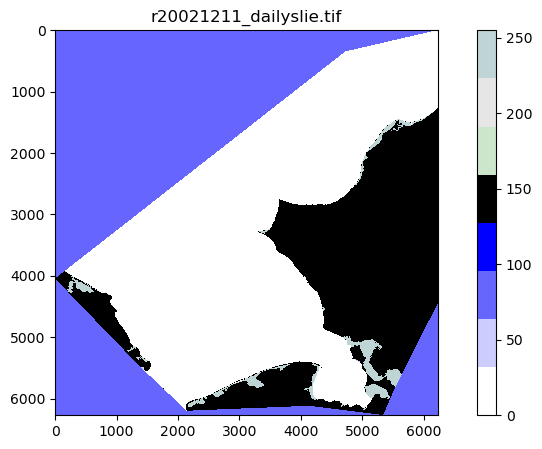

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2003-04 is identical.


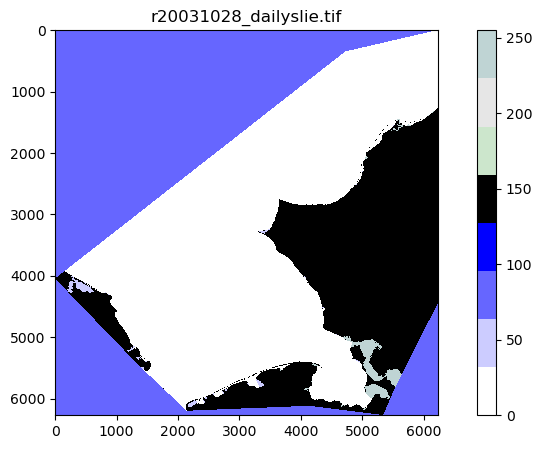

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2004-05 is identical.


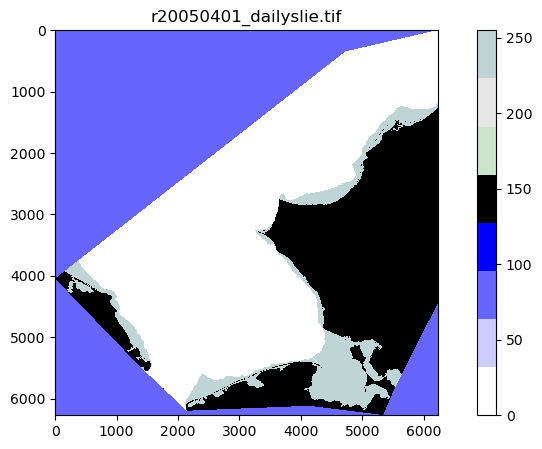

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2005-06 is identical.


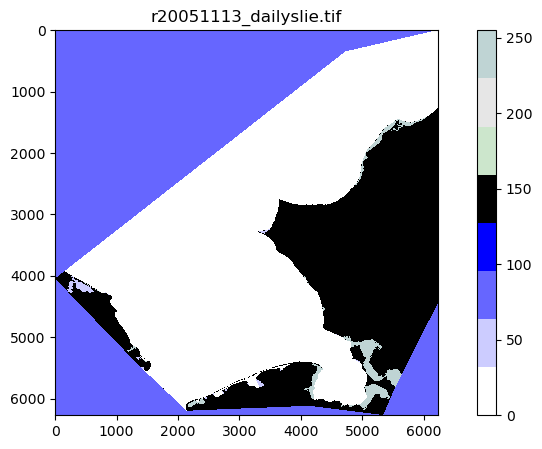

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2006-07 is identical.


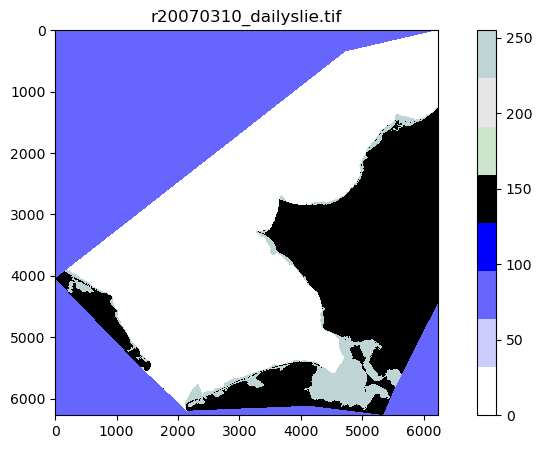

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2007-08 is identical.


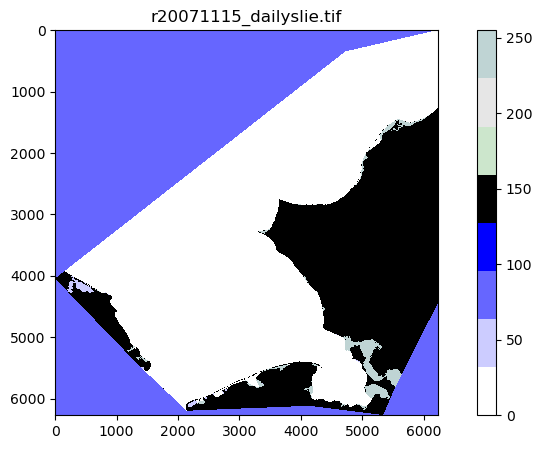

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2008-09 is identical.


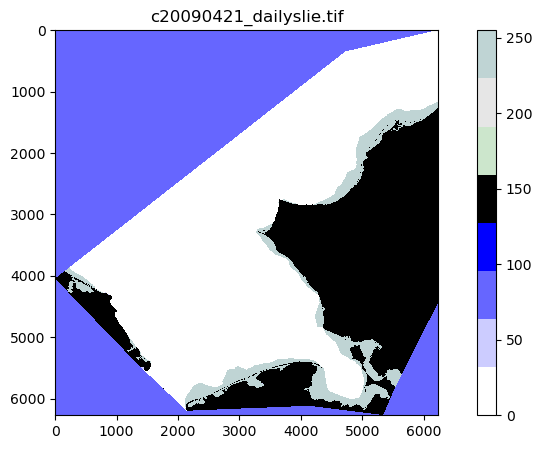

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2009-10 is identical.


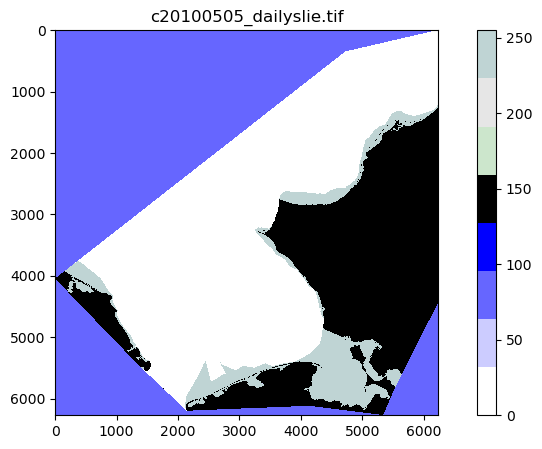

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2010-11 is identical.


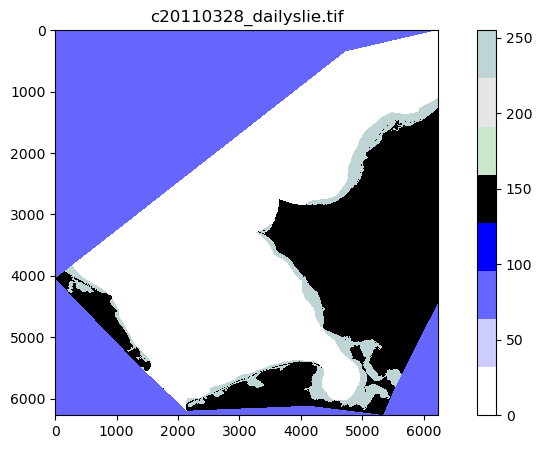

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2011-12 is identical.


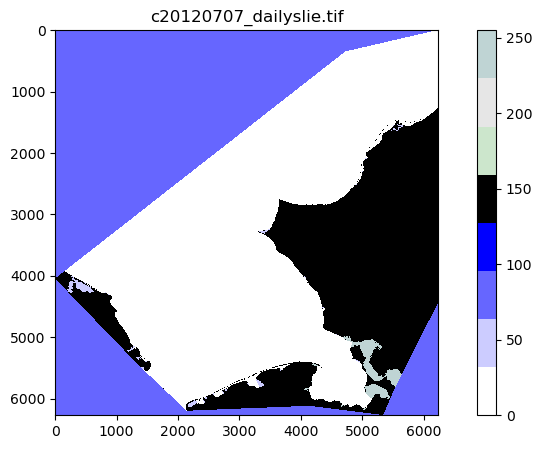

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2012-13 is identical.


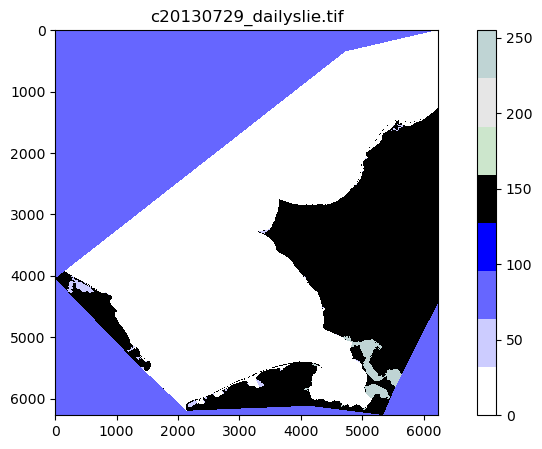

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2013-14 is identical.


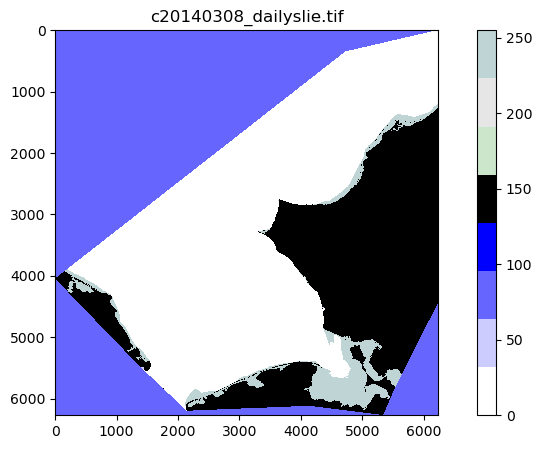

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2014-15 is identical.


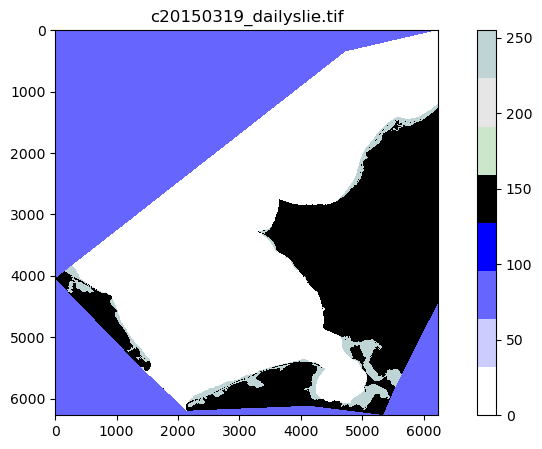

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2015-16 is identical.


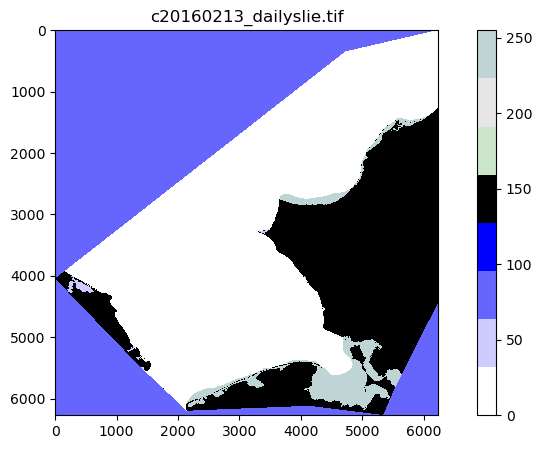

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2016-17 is identical.


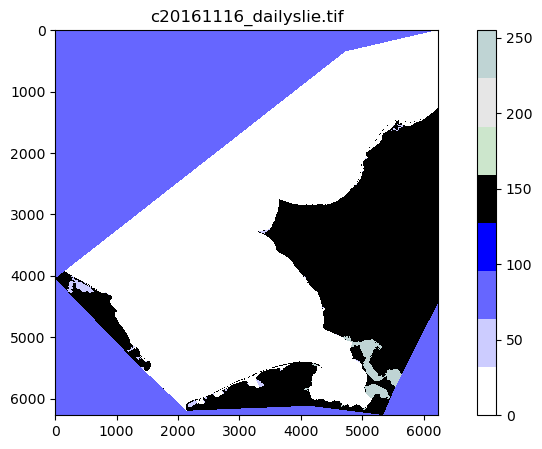

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2017-18 is identical.


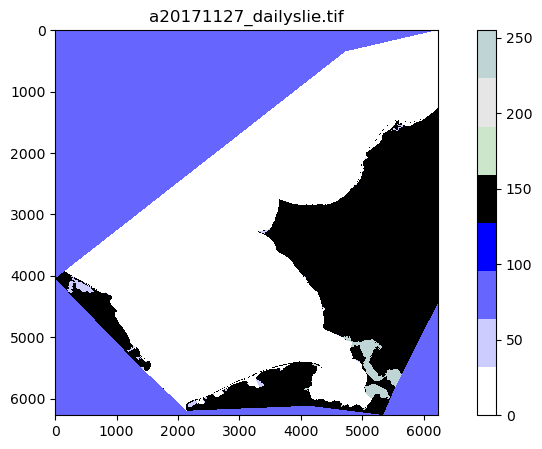

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2018-19 is identical.


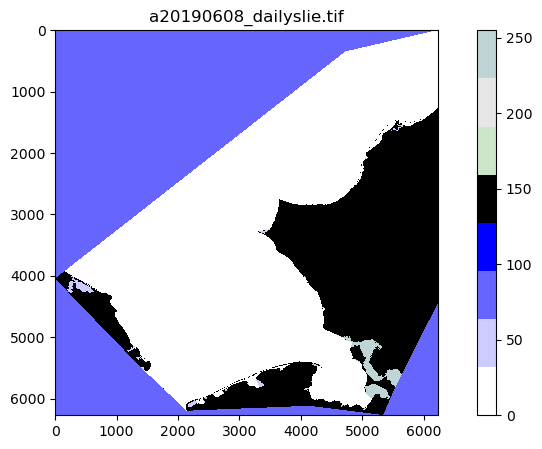

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2019-20 is identical.


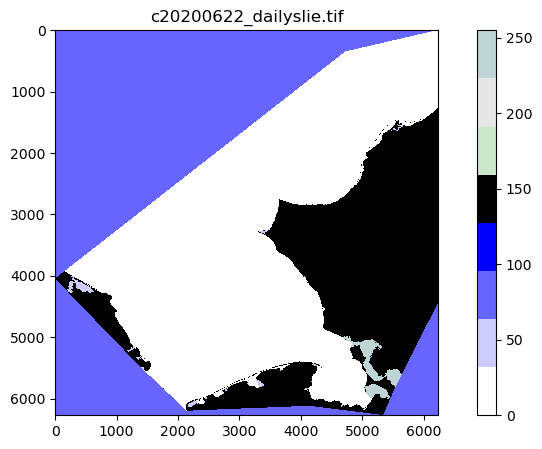

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2020-21 is identical.


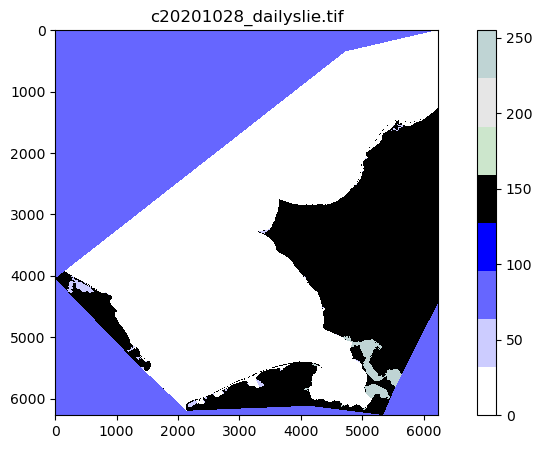

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2021-22 is identical.


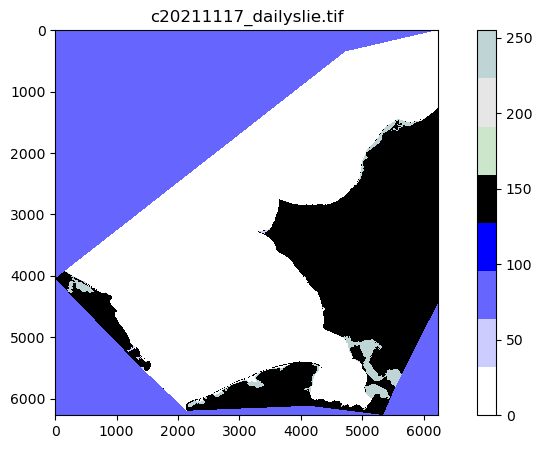

All GeoTIFF metadata in /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2022-23 is identical.


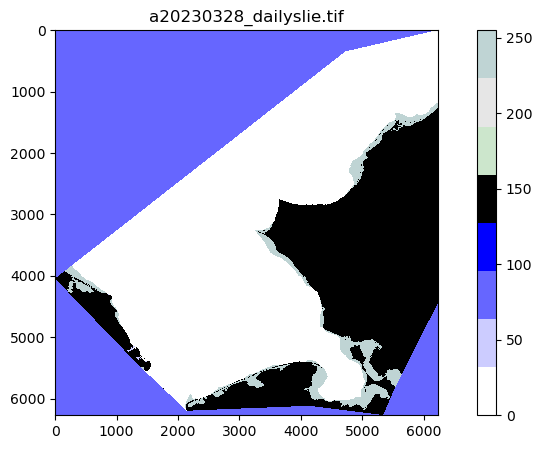

In [4]:
for directory in daily_slie_paths:
    eda.test_geotiff_metadata_for_conformity(directory, geotiff_metadata=None, str_to_match="dailyslie")
    eda.plot_random_sample(directory)

So far so good - there is constant metadata within each directory, and the data pass the eyeball test, at least for the random sample plotted here.
The next step is to determine how we might reproject these data. The Beaufort and Chukchi ice zones are geographically adjacent and together encompass Alaska's Arctic coastline - but how the data products line up is unknown.
We can test this by running a stock `merge` command on the data and looking at the outputs.

In [5]:
chuk_sample = Path("/beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2022-23/a20221201_dailyslie.tif")
beauf_sample = Path("/beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2022-23/a20221201_dailyslie.tif")

with rio.open(beauf_sample) as src:
    print("Original Beaufort Meta")
    print(src.meta)

with rio.open(chuk_sample) as src:
    print("Original Chukchi Meta")
    print(src.meta)

# merge order matters, reverse painter's algorithm is the default ordering used by rasterio.merge.merge
# so we will look at both cases
beau_overlay_chuk, aff_ = merge([chuk_sample, beauf_sample])
chuk_overlay_beauf, aff2_ = merge([beauf_sample, chuk_sample])

Original Beaufort Meta
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9554, 'height': 3298, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",50],PARAMETER["longitude_of_center",-154],PARAMETER["standard_parallel_1",55],PARAMETER["standard_parallel_2",65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(100.0, 0.0, -236180.0,
       0.0, -100.0, 2509919.0)}
Original Chukchi Meta
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 6234, 'height': 6271, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["NAD83",DATUM["North_American_Datum_1983

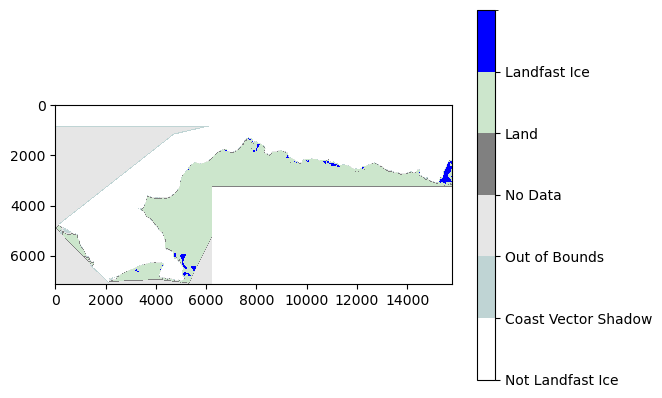

In [6]:
eda.plot_daily_slie_array(beau_overlay_chuk[0])

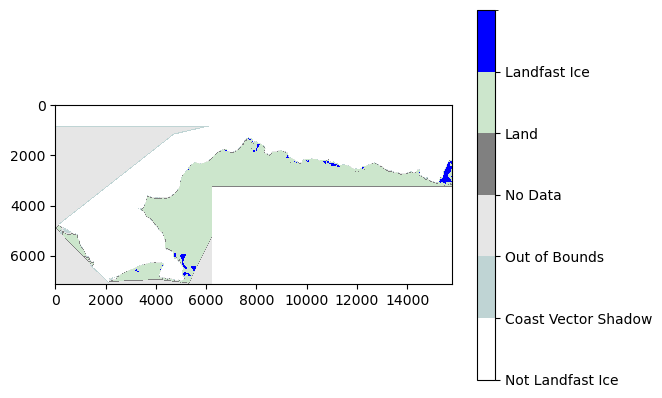

In [7]:
eda.plot_daily_slie_array(chuk_overlay_beauf[0])

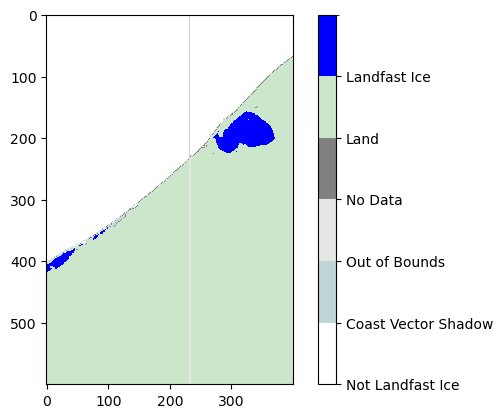

In [8]:
eda.plot_daily_slie_array(beau_overlay_chuk[0, 1900:2500, 6000:6400])

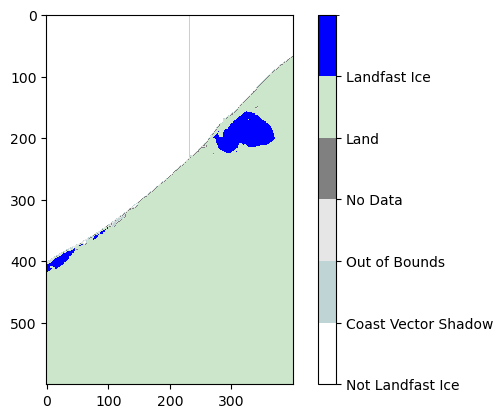

In [9]:
eda.plot_daily_slie_array(chuk_overlay_beauf[0, 1900:2500, 6000:6400])

The full extent of the merge product looks good - but upon closer inspection, however, there is an unsightly seam where the two data products meet.

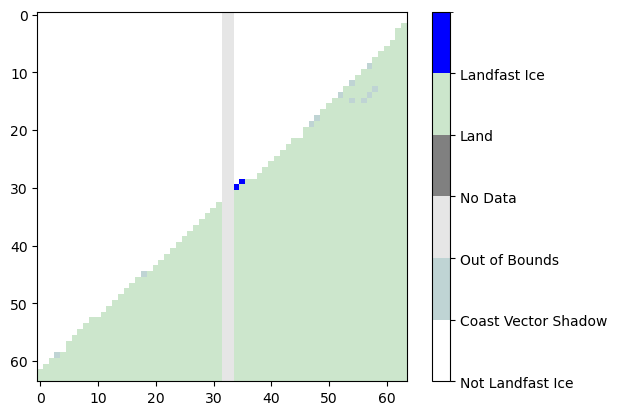

In [10]:
eda.plot_daily_slie_array(beau_overlay_chuk[0, 2100:2164, 6200:6264])

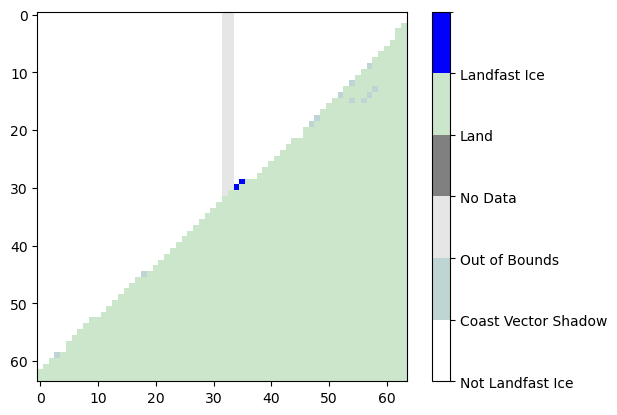

In [11]:
eda.plot_daily_slie_array(chuk_overlay_beauf[0, 2100:2164, 6200:6264])

Terrestrial integrity improves when the Chukchi data overlays the Beaufort. There is just a marine "No Data" strip - and that's OK. But because of this seam we might look at using a `target aligned pixels` GDAL-esque method when we reproject these data.
Let's do some test reprojections.

In [12]:
# some test parameters
dst_crs = rio.crs.CRS.from_epsg(3338)
tr = 100

# reproject to 3338 without adjust output bounds so that pixel coordinates are integer multiples of pixel size, i.e. matching the -tap option of GDAL
# expectation is that this won't change the results
def reproject_raster(file):

    dst_crs = rio.crs.CRS.from_epsg(3338)

    with rio.open(file) as src:

        # compute the new affine transformation, width and height
        warp_transform, width, height = rio.warp.calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        # define the output raster profile
        out_profile = src.profile.copy()
        out_profile.update(
            {
                "crs": dst_crs,
                "transform": warp_transform,
                "width": width,
                "height": height,
                "bounds": array_bounds(height, width, warp_transform),
            }
        )

        # create the new raster file
        out_file = SCRATCH_DIR / f"reproj_no_tap_{file.parent.parent.name}_{file.name}"
        with rio.open(out_file, "w", **out_profile) as dst:
            # reproject the input raster data
            rio.warp.reproject(
                source=src.read(1),
                destination=rio.band(dst, 1),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=warp_transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,  # NN is default, but explicit here for easy change or experimentation later
            )

reproject_raster(chuk_sample)
reproject_raster(beauf_sample)
reproj_no_tap_chuk_sample = SCRATCH_DIR / f"reproj_no_tap_{chuk_sample.parent.parent.name}_{chuk_sample.name}"
reproj_no_tap_beauf_sample = SCRATCH_DIR / f"reproj_no_tap_{beauf_sample.parent.parent.name}_{beauf_sample.name}"

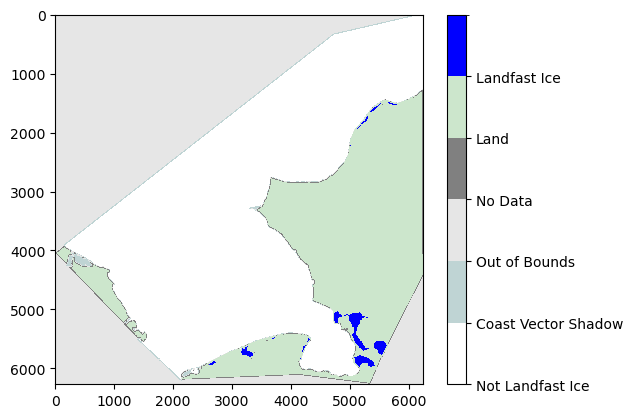

In [13]:
with rio.open(reproj_no_tap_chuk_sample) as src:
    arr = src.read(1)
    eda.plot_daily_slie_array(arr)

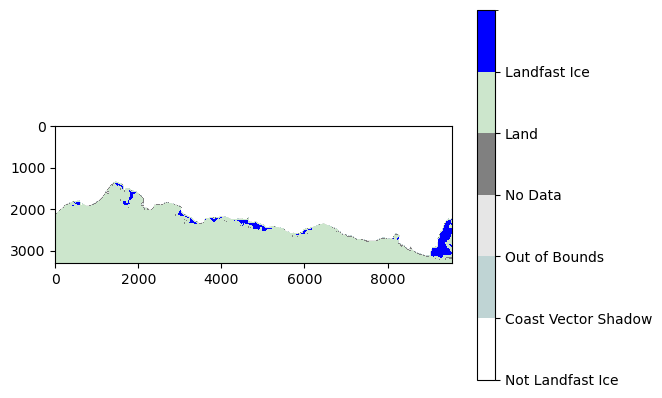

In [14]:
with rio.open(reproj_no_tap_beauf_sample) as src:
    arr = src.read(1)
    eda.plot_daily_slie_array(arr)

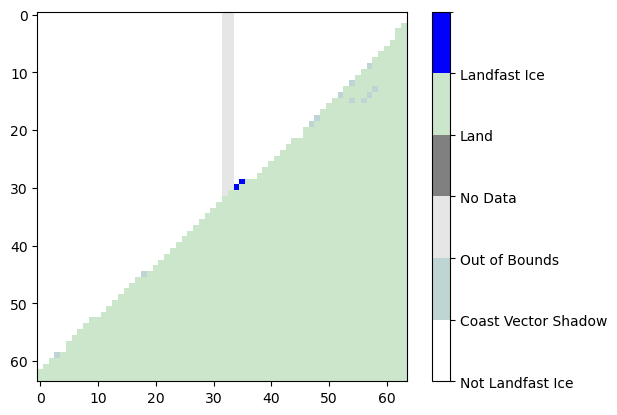

In [15]:
reproj_no_tap_chuk_overlay_beauf, _ = merge([reproj_no_tap_beauf_sample, reproj_no_tap_chuk_sample])
eda.plot_daily_slie_array(reproj_no_tap_chuk_overlay_beauf[0, 2100:2164, 6200:6264])

In [16]:
with rio.open(reproj_no_tap_beauf_sample) as src:
    print("Beaufort Meta")
    print(src.meta)

with rio.open(reproj_no_tap_chuk_sample) as src:
    print("Chukchi Meta")
    print(src.meta)

Beaufort Meta
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9554, 'height': 3298, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.00000000139293, 0.0, -236180.00000348824,
       0.0, -100.00000000139293, 2509919.000012114)}
Chukchi Meta
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 6234, 'height': 6271, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(99.99999982756368, 0.0, -859401.4465308683,
       0.0, -99.99999982756368, 2423189.1033449764)}


This is as expected - the data and the overlay of the two rasters look identical when merely reprojecting to 3338 without tapping the pixels.
The floating-point junk of `-100.00000000139293` in the pixel size parameter of the affine transform is not unexpected either, but something we can alter via prescribing a target resolution parameter.
The expectation is 100 m resolution data here.

In [17]:
def tap_reproject_raster(file):

    with rio.open(file) as src:

        # compute the new affine transformation, width and height
        warp_transform, width, height = rio.warp.calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds, resolution=(tr, tr)
        )
        
        tap_transform, tap_width, tap_height = aligned_target(
            warp_transform, width, height, tr
        )
        
        # define the output raster profile
        out_profile = src.profile.copy()
        out_profile.update(
            {
                "crs": dst_crs,
                "transform": tap_transform,
                "width": tap_width,
                "height": tap_height,
                "bounds": array_bounds(tap_height, tap_width, tap_transform),
            }
        )

        # create the new raster file
        out_file = SCRATCH_DIR / f"reproj_tap_{file.parent.parent.name}_{file.name}"
        with rio.open(out_file, "w", **out_profile) as dst:
            # reproject the input raster data
            rio.warp.reproject(
                source=src.read(1),
                destination=rio.band(dst, 1),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=tap_transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,  # NN is default, but explicit here for easy change or experimentation later
            )

tap_reproject_raster(chuk_sample)
tap_reproject_raster(beauf_sample)
tap_chuk_sample = SCRATCH_DIR / f"reproj_tap_{chuk_sample.parent.parent.name}_{chuk_sample.name}"
tap_beauf_sample = SCRATCH_DIR / f"reproj_tap_{beauf_sample.parent.parent.name}_{beauf_sample.name}"

with rio.open(tap_beauf_sample) as src:
    print("Beaufort Meta")
    print(src.meta)

with rio.open(tap_chuk_sample) as src:
    print("Chukchi Meta")
    print(src.meta)

Beaufort Meta
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9556, 'height': 3300, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -236200.0,
       0.0, -100.0, 2510000.0)}
Chukchi Meta
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 6235, 'height': 6272, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -859500.0,
       0.0, -100.0, 2423200.0)}


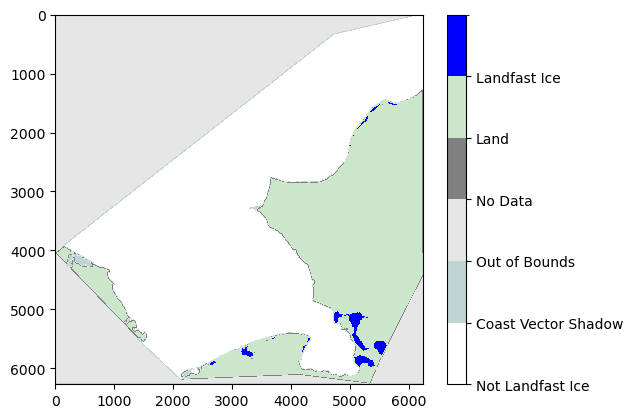

In [18]:
with rio.open(tap_chuk_sample) as src:
    arr = src.read(1)
    eda.plot_daily_slie_array(arr)

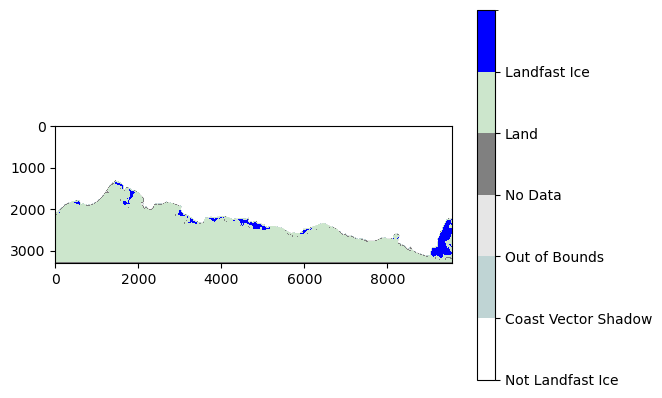

In [19]:
with rio.open(tap_beauf_sample) as src:
    arr = src.read(1)
    eda.plot_daily_slie_array(arr)

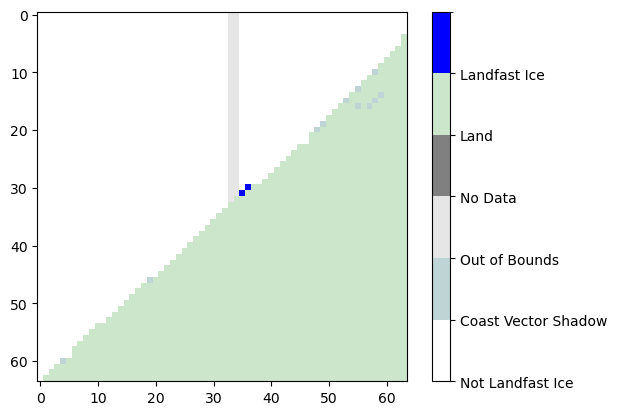

In [20]:
reproj_tap_chuk_overlay_beauf, _ = merge([tap_beauf_sample, tap_chuk_sample])
eda.plot_daily_slie_array(reproj_tap_chuk_overlay_beauf[0, 2100:2164, 6200:6264])

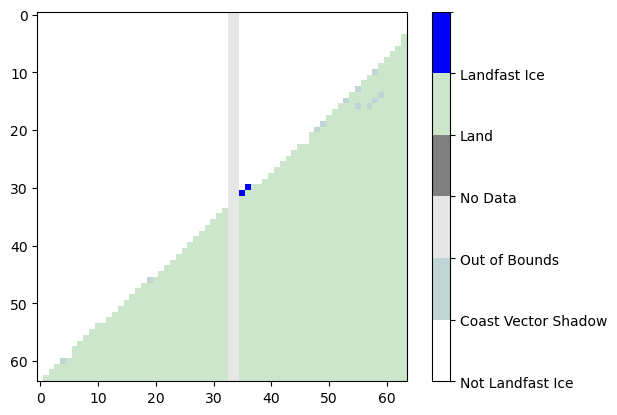

In [21]:
reproj_tap_beauf_overlay_chuk, _ = merge([tap_chuk_sample, tap_beauf_sample])
eda.plot_daily_slie_array(reproj_tap_beauf_overlay_chuk[0, 2100:2164, 6200:6264])

Well, we can see that the results of the default tap really didn't have much of an impact. That makes sense if you compare the metadata, we only bumped things like one meter.
We can also compare results against the default `gdalwarp -tap` output.

In [22]:
import subprocess

def gdalwarp_reproject_raster(file, to_crs="EPSG:3338"):
    # Define the output file path
    out_file = SCRATCH_DIR / f"gdal_reproj_tap_{file.parent.parent.name}_{file.name}"
    
    # Construct the gdalwarp command
    cmd = [
        "gdalwarp",
        "-t_srs", to_crs,  # Target CRS
        "-tr", str(tr), str(tr),  # Target resolution
        "-r", "near",  # Resampling method (nearest neighbor)
        "-tap",
        "-overwrite", # Align the target resolution to the pixel grid
        str(file),  # Input file
        str(out_file)  # Output file
    ]
    
    # Run the gdalwarp command
    subprocess.run(cmd, check=True)

# Example usage
gdalwarp_reproject_raster(chuk_sample)
gdalwarp_reproject_raster(beauf_sample)

Warning 1: The definition of geographic CRS EPSG:4269 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
Warning 1: The definition of geographic CRS EPSG:4269 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.


Creating output file that is 6235P x 6272L.
Processing /beegfs/CMIP6/cparr4/landfast_sea_ice/Chuk/2022-23/a20221201_dailyslie.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 9555P x 3299L.
Processing /beegfs/CMIP6/cparr4/landfast_sea_ice/Beau/2022-23/a20221201_dailyslie.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [23]:
gdal_tap_chuk_sample = SCRATCH_DIR / f"gdal_reproj_tap_{chuk_sample.parent.parent.name}_{chuk_sample.name}"
gdal_tap_beauf_sample = SCRATCH_DIR / f"gdal_reproj_tap_{beauf_sample.parent.parent.name}_{beauf_sample.name}"

with rio.open(gdal_tap_beauf_sample) as src:
    print("Beaufort Meta")
    print(src.meta)

with rio.open(gdal_tap_chuk_sample) as src:
    print("Chukchi Meta")
    print(src.meta)

Beaufort Meta
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9555, 'height': 3299, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -236200.0,
       0.0, -100.0, 2510000.0)}
Chukchi Meta
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 6235, 'height': 6272, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -859500.0,
       0.0, -100.0, 2423200.0)}


In [24]:
pd.set_option("display.precision", 12)
def fetch_all_geotiff_metadata(directory, str_to_match=None):
    """Fetch metadata of all GeoTIFF files in a directory and return as a pandas DataFrame."""
    geotiffs = eda.list_geotiffs(directory, str_to_match)
    metadata_list = []

    for geotiff in geotiffs:
        with rio.open(geotiff) as src:
            meta = src.profile
            affine = src.transform
            meta_dict = {
                'driver': meta.get('driver'),
                'dtype': meta.get('dtype'),
                'nodata': meta.get('nodata'),
                'width': meta.get('width'),
                'height': meta.get('height'),
                'count': meta.get('count'),
                'crs': meta.get('crs'),
                'transform_a': affine.a,
                'transform_b': affine.b,
                'transform_c': affine.c,
                'transform_d': affine.d,
                'transform_e': affine.e,
                'transform_f': affine.f
            }
            meta_dict['filename'] = geotiff.name
            metadata_list.append(meta_dict)

    df = pd.DataFrame(metadata_list)
    df.set_index('filename', inplace=True)
    return df
    
fetch_all_geotiff_metadata(SCRATCH_DIR, "Chuk")

,driver,dtype,nodata,width,height,count,crs,transform_a,transform_b,transform_c,transform_d,transform_e,transform_f
filename,,,,,,,,,,,,,
gdal_reproj_tap_Chuk_a20221201_dailyslie.tif,GTiff,uint8,None,6235,6272,1,(init),100.000000000000,0.0,-859500.000000000000,0.0,-100.000000000000,2.423200000000e+06
reproj_tap_Chuk_a20221201_dailyslie.tif,GTiff,uint8,None,6235,6272,1,(init),100.000000000000,0.0,-859500.000000000000,0.0,-100.000000000000,2.423200000000e+06
reproj_no_tap_Chuk_a20221201_dailyslie.tif,GTiff,uint8,None,6234,6271,1,(init),99.999999827564,0.0,-859401.446530868299,0.0,-99.999999827564,2.423189103345e+06


In [25]:
fetch_all_geotiff_metadata(SCRATCH_DIR, "Beau")

,driver,dtype,nodata,width,height,count,crs,transform_a,transform_b,transform_c,transform_d,transform_e,transform_f
filename,,,,,,,,,,,,,
reproj_tap_Beau_a20221201_dailyslie.tif,GTiff,uint8,None,9556,3300,1,(init),100.000000000000,0.0,-236200.00000000000,0.0,-100.000000000000,2.510000000000e+06
reproj_no_tap_Beau_a20221201_dailyslie.tif,GTiff,uint8,None,9554,3298,1,(init),100.000000001393,0.0,-236180.00000348824,0.0,-100.000000001393,2.509919000012e+06
gdal_reproj_tap_Beau_a20221201_dailyslie.tif,GTiff,uint8,None,9555,3299,1,(init),100.000000000000,0.0,-236200.00000000000,0.0,-100.000000000000,2.510000000000e+06


Alright - there isn't much a difference between these methods. The only thing to note is that the `rasterio` implementation of a `tap` reproject (i.e., warp) call can in **some** cases yield slightly different height and width values when compared to the GDAL version. The important takeaways here are that the `-tap` is worthwhile because it will better align the grids and permit fusing the Chukchi and Beaufort zones if that ends up being a desirable thing to do. The other thing to note here is that while NoData values are described for these data, they aren't actually specified in the geospatial product. We'll want to set a no data value of `111` per the documentation that arrived with this dataset.